<a href="https://colab.research.google.com/github/smlra-kjsce/ML-101/blob/master/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

####While we used linear regression to deal with continuous data, that helped in predicting a future value on the basis of past data, logistic regression is different. Logsitic regression is used when the dependent variable is dichotomous (binary). For example: positive-negative, 0-1, pass-fail, benign-malignant, etc. It is assumed that the data for such dichotomous nature would be independent and that there's no correlation of data between two classes.


Many will think, why not linear regression? That's because linear data plotted on graph may look something like this:


<figure>
<center>
<img src='https://drive.google.com/uc?id=192bLivyYTXRLQaJsG8h-8jphieelQ-HX'/>
  </center>
  <center><figcaption><b>Linear Regression to fit dichotomous data</b></figcaption></center>
</figure>

But what if we are faced with data having outlier points? 

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Bk_tgAS1gMjEKqh6CVo6iZ3vNYzLf6Hx'/>
  </center>
  <center><figcaption><b>Linear Regression to fit dichotomous data with outliers</b></figcaption></center>
</figure>

It is clearly visible that the line shifts just because of one outlier. This increases confusion of the model. 

Hence, Logistic regression is used.

In logistic regression, we use logistic functions that are used to plot probabilistic models. 

Sigmoid function is a logistic function that's used in logistic regression. This is how it looks: 


<figure>
<center>
<img src='https://drive.google.com/uc?id=1ro0WaW1kszK3InLQNVoKAoFD9K370REO'/>
  </center>
  <center><figcaption><b>Sigmoid function</b></figcaption></center>
</figure>

### Let's plot this graph using Python.

In [ ]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter('ignore')

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

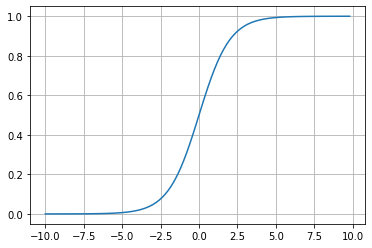

In [ ]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.grid(True)
plt.show()

### As an example, we will start working on the famous Titanic Dataset hosted on Kaggle. This example will also help us understand some data pre processing and how to draw inference and make next steps.

Download From : 
https://www.kaggle.com/c/titanic/data or from Drive Link : https://drive.google.com/drive/folders/19mWZBWwEy1aRwHweSG4zlM81rOuGJ3QE?usp=sharing


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
test_df = pd.read_csv("/content/drive/My Drive/ML-DL101 Datasets/test_titanic.csv")
train_df = pd.read_csv("/content/drive/My Drive/ML-DL101 Datasets/train_titanic.csv")

In [ ]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The head of the data gives us an indication of various parameters that need to be converted into numeric form for prediction. 

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '% missing'])
missing_data.head(5)

,Total,% missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


From above data, we can make following inferences:

1. Around 77% of cabin data is missing. This % is huge. So, we can't afford to drop data row-wise. It's better to delete this column entirely since majority values are missing anyways.

2. Embarked value can be easily filled.

3. With some common sense, we can eliminate variables like PassengerId, Name and Ticket as we don't expect them to have much corelation with survival chance.

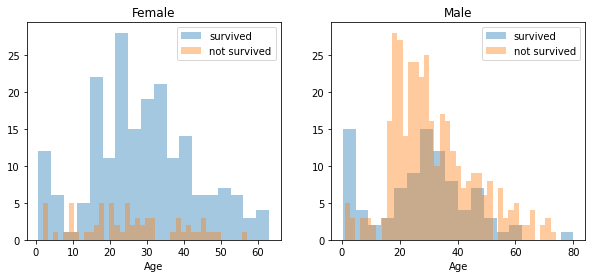

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

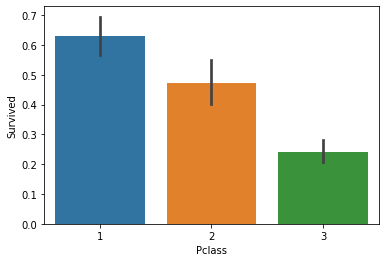

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [ ]:
#Combining SibSp and Parch to show if someone is alone or not
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [ ]:
train_df = train_df.drop(['PassengerId','Cabin'], axis=1)

In [ ]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()


0

In [ ]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 83.7+ KB


In [ ]:
train_df = train_df.drop(['Ticket','Name'], axis=1)
test_df = test_df.drop(['Ticket','Name'], axis=1)

In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

4    166
6    162
5    147
3    135
2    121
1     92
0     68
Name: Age, dtype: int64

In [ ]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,0,2,1,0,7.2500,0,1,0
1,1,1,1,5,1,0,71.2833,1,1,0
2,1,3,1,3,0,0,7.9250,0,0,1
3,1,1,1,5,1,0,53.1000,0,1,0
4,0,3,0,5,0,0,8.0500,0,0,1
5,0,3,0,3,0,0,8.4583,2,0,1
6,0,1,0,6,0,0,51.8625,0,0,1
7,0,3,0,0,3,1,21.0750,0,4,0
8,1,3,1,3,0,2,11.1333,0,2,0
9,1,2,1,1,1,0,30.0708,1,1,0


In [ ]:
X_train = train_df.drop(["Survived","Fare"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId","Cabin","Fare"], axis=1).copy()

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives,not_alone
0,3,0,2,1,0,0,1,0
1,1,1,5,1,0,1,1,0
2,3,1,3,0,0,0,0,1
3,1,1,5,1,0,0,1,0
4,3,0,5,0,0,0,0,1


In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives,not_alone
0,3,0,2,0,0,2,0,1
1,3,1,5,1,0,0,1,0
2,2,0,3,0,0,2,0,1
3,3,0,5,0,0,0,0,1
4,3,1,5,1,1,0,2,0


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("Accuracy via logistic regression: ",acc_log)

Accuracy via logistic regression:  80.36


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.7752809  0.76404494 0.82022472 0.82022472 0.79775281
 0.82022472 0.79775281 0.82022472 0.80898876]
Mean: 0.7991385767790262
Standard Deviation: 0.021759010321058186


In [ ]:
logreg.predict(X_test)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,relatives,not_alone
0,3,0,2,0,0,2,0,1
1,3,1,5,1,0,0,1,0
2,2,0,3,0,0,2,0,1
3,3,0,5,0,0,0,0,1
4,3,1,5,1,1,0,2,0
